In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf

df = pd.read_csv(r"C:\Users\m\Taha\Codebasics Challenges\Parliament Elections\LOK SABHA.csv")

In [2]:
df.head()

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors,Year,candidate_rank,pc_votes,pc_electors,state_votes,state_electors,party_votes,party_rank
0,Andhra Pradesh,Adilabad,Godam Nagesh,Male,49,ST,TRS,Car,425762,5085,430847,1386282,2014,1,1045839,12476538,48367188,1028145613,430847,1
1,Andhra Pradesh,Adilabad,Naresh,Male,37,ST,INC,Hand,257994,1563,259557,1386282,2014,2,1045839,12476538,48367188,1028145613,259557,2
2,Andhra Pradesh,Adilabad,Ramesh Rathod,Male,48,ST,TDP,Bicycle,182879,1319,184198,1386282,2014,3,1045839,12476538,48367188,1028145613,184198,3
3,Andhra Pradesh,Adilabad,Rathod Sadashiv,Male,55,ST,BSP,Elephant,94363,57,94420,1386282,2014,4,1045839,12476538,48367188,1028145613,94420,4
4,Andhra Pradesh,Adilabad,Nethawath Ramdas,Male,44,ST,IND,Auto- Rickshaw,41028,4,41032,1386282,2014,5,1045839,12476538,48367188,1028145613,59733,5


## Q1. top 5 candidates based on margin difference with runners in 2014 and 2019

In [3]:
df1 = df[df['candidate_rank'].isin([1,2])]
df1

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors,Year,candidate_rank,pc_votes,pc_electors,state_votes,state_electors,party_votes,party_rank
0,Andhra Pradesh,Adilabad,Godam Nagesh,Male,49,ST,TRS,Car,425762,5085,430847,1386282,2014,1,1045839,12476538,48367188,1028145613,430847,1
1,Andhra Pradesh,Adilabad,Naresh,Male,37,ST,INC,Hand,257994,1563,259557,1386282,2014,2,1045839,12476538,48367188,1028145613,259557,2
9,Andhra Pradesh,Amalapuram,Dr Pandula Ravindra Babu,Male,58,SC,TDP,Bicycle,591480,3067,594547,1357865,2014,1,1120927,20367975,48367188,1028145613,594547,1
10,Andhra Pradesh,Amalapuram,Pinipe Viswarupu,Male,51,SC,YSRCP,Ceiling Fan,470804,3167,473971,1357865,2014,2,1120927,20367975,48367188,1028145613,473971,2
24,Andhra Pradesh,Anakapalli,Muttamsetti Srinivasa Rao (Avanthi),Male,47,GEN,TDP,Bicycle,566667,1796,568463,1401474,2014,1,1148072,12613266,48367188,1028145613,568463,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16914,Tripura,Tripura West,Arunoday Saha,Male,65,GEN,INC,Hand,167226,953,168179,1248546,2014,2,1072749,17479644,2023829,32303232,168179,2
16927,Tripura,Tripura East,Rebati Tripura,Male,43,ST,BJP,Lotus,479634,2492,482126,1261861,2019,1,1045417,13880471,2153172,32820469,482126,1
16928,Tripura,Tripura East,Maharaj Kumari Pragya Debburman,Female,50,ST,INC,Hand,276517,1319,277836,1261861,2019,2,1045417,13880471,2153172,32820469,277836,2
16938,Tripura,Tripura West,Pratima Bhoumik,Female,50,GEN,BJP,Lotus,570021,3511,573532,1352857,2019,1,1107755,18939998,2153172,32820469,573532,1


In [4]:
query = """
select 
    *
from
(
select
    pc_name,
    candidate,
    Year,
    candidate_rank,
    total_votes,
    sum(case when candidate_rank = 1 then total_votes end) over(partition by pc_name, Year) - sum(case when candidate_rank = 2 then total_votes end) over(partition by pc_name, Year) as margin_diff
from
    df1
group by
    pc_name, candidate, Year, candidate_rank, total_votes
                                                            ) as sub
                                                            
where candidate_rank = 1
order by margin_diff desc
"""
winner_candidates = sqldf(query)
winner_candidates

,pc_name,candidate,Year,candidate_rank,total_votes,margin_diff
0,Navsari,C. R. Patil,2019,1,972739,689668
1,Karnal,Sanjay Bhatia,2019,1,911594,656142
2,Faridabad,Krishan Pal,2019,1,913222,638239
3,Bhilwara,Subhash Chandra Baheria,2019,1,938160,612000
4,Vadodara,Ranjanben Bhatt,2019,1,883719,589177
...,...,...,...,...,...,...
1043,Andaman & Nicobar Islands,Kuldeep Rai Sharma,2019,1,95308,1407
1044,Arambagh,Aparupa Poddar (Afrin Ali),2019,1,649929,1142
1045,Lakshadweep,Mohammed Faizal Pp,2019,1,22851,823
1046,Machhlishahr,Bholanath (B.P. Saroj),2019,1,488397,181


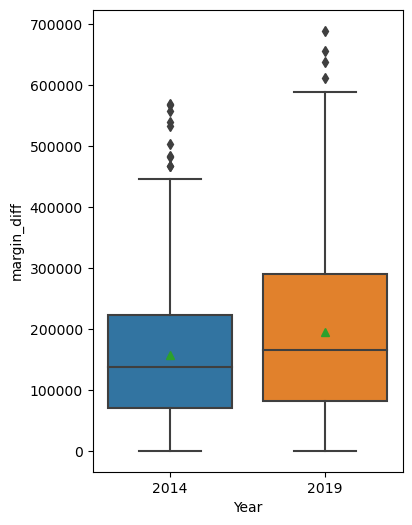

In [6]:
plt.figure(figsize = (4,6))
sns.boxplot(data = winner_candidates, y = 'margin_diff', showmeans = True, x = 'Year')
plt.show()

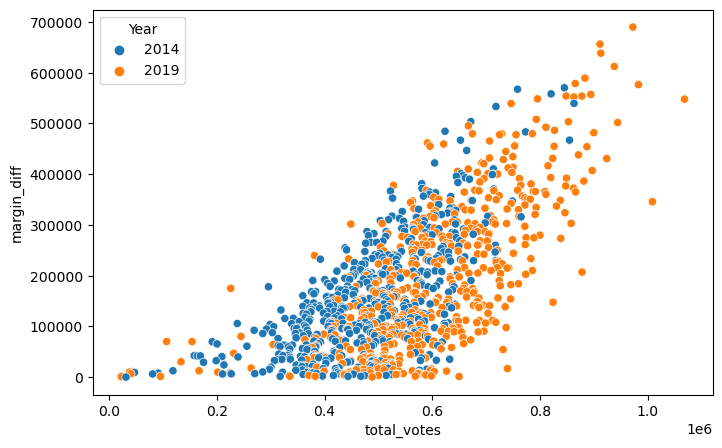

In [7]:
plt.figure(figsize = (8,5))
sns.scatterplot(data = winner_candidates, x = 'total_votes', y = 'margin_diff', hue = 'Year',palette=['#1f77b4', '#ff7f0e'] )
plt.show()

In [8]:
winner_candidates[winner_candidates['Year'] == 2014][:5]

,pc_name,candidate,Year,candidate_rank,total_votes,margin_diff
7,Vadodara,Narendra Modi,2014,1,845464,570128
8,Ghaziabad,Vijay Kumar Singh,2014,1,758482,567260
9,Navsari,C. R. Patil,2014,1,820831,558116
16,Jaipur,Ramcharan Bohara,2014,1,863358,539345
18,Surat,Darshana Vikram Jardosh,2014,1,718412,533190


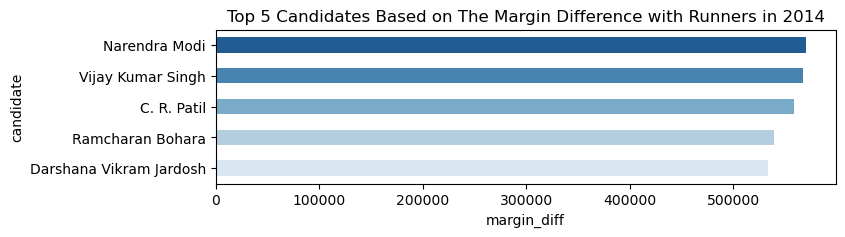

In [9]:
plt.figure(figsize = (8,2))
sns.barplot(data= winner_candidates[winner_candidates['Year'] == 2014][:5],
            y = 'candidate', x = 'margin_diff', palette = 'Blues_r', width = .5)
plt.title('Top 5 Candidates Based on The Margin Difference with Runners in 2014')
plt.show()

In [10]:
winner_candidates[winner_candidates['Year'] == 2019][:5]

,pc_name,candidate,Year,candidate_rank,total_votes,margin_diff
0,Navsari,C. R. Patil,2019,1,972739,689668
1,Karnal,Sanjay Bhatia,2019,1,911594,656142
2,Faridabad,Krishan Pal,2019,1,913222,638239
3,Bhilwara,Subhash Chandra Baheria,2019,1,938160,612000
4,Vadodara,Ranjanben Bhatt,2019,1,883719,589177


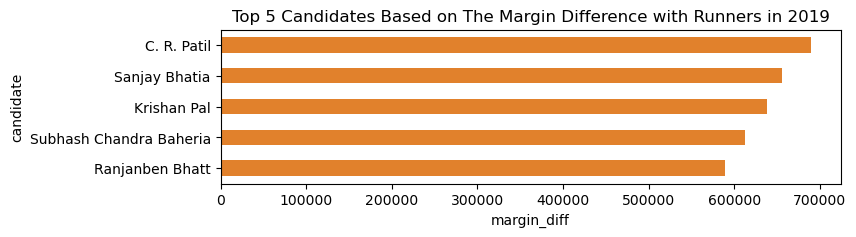

In [11]:
plt.figure(figsize = (8,2))
sns.barplot(data= winner_candidates[winner_candidates['Year'] == 2019][:5],
            y = 'candidate', x = 'margin_diff', color = '#ff7f0e', width = .5)
plt.title('Top 5 Candidates Based on The Margin Difference with Runners in 2019')
plt.show()

# Q2. Gender

In [12]:
winners_data = df[df['candidate_rank'] == 1]
winners_data

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors,Year,candidate_rank,pc_votes,pc_electors,state_votes,state_electors,party_votes,party_rank
0,Andhra Pradesh,Adilabad,Godam Nagesh,Male,49,ST,TRS,Car,425762,5085,430847,1386282,2014,1,1045839,12476538,48367188,1028145613,430847,1
9,Andhra Pradesh,Amalapuram,Dr Pandula Ravindra Babu,Male,58,SC,TDP,Bicycle,591480,3067,594547,1357865,2014,1,1120927,20367975,48367188,1028145613,594547,1
24,Andhra Pradesh,Anakapalli,Muttamsetti Srinivasa Rao (Avanthi),Male,47,GEN,TDP,Bicycle,566667,1796,568463,1401474,2014,1,1148072,12613266,48367188,1028145613,568463,1
33,Andhra Pradesh,Anantapur,J.C. Divakar Reddi,Male,70,GEN,TDP,Bicycle,606849,3439,610288,1536894,2014,1,1212145,21516516,48367188,1028145613,610288,1
47,Andhra Pradesh,Aruku,Kothapalli Geetha,Female,43,ST,YSRCP,Ceiling Fan,410730,2461,413191,1272340,2014,1,909614,15268080,48367188,1028145613,413191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16888,Sikkim,Sikkim,Indra Hang Subba,Male,30,GEN,SKM,Table Lamp,161143,5779,166922,434128,2019,1,351746,5209536,351746,5209536,166922,1
16900,Tripura,Tripura East,Jitendra Chaudhury,Male,57,ST,CPM,"Hammer, Sickle And Star",620251,3520,623771,1140276,2014,1,951080,14823588,2023829,32303232,623771,1
16913,Tripura,Tripura West,Sankar Prasad Datta,Male,56,GEN,CPM,"Hammer, Sickle And Star",667086,4579,671665,1248546,2014,1,1072749,17479644,2023829,32303232,671665,1
16927,Tripura,Tripura East,Rebati Tripura,Male,43,ST,BJP,Lotus,479634,2492,482126,1261861,2019,1,1045417,13880471,2153172,32820469,482126,1


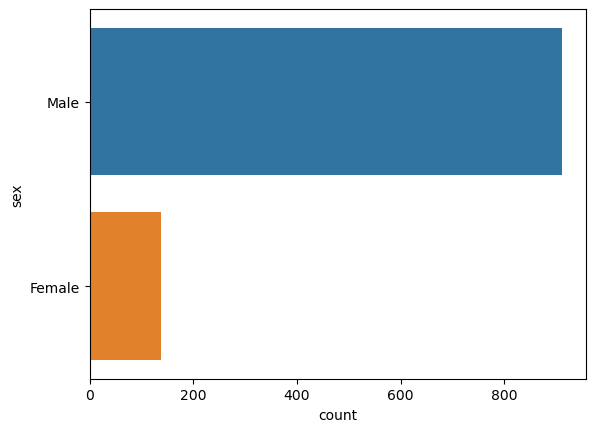

In [13]:
sns.countplot(data = winners_data, y = 'sex')
plt.show()

In [14]:
gender_ditribution = winners_data.groupby(['Year', 'sex']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)

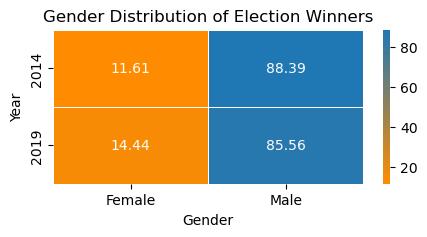

In [15]:
from matplotlib.colors import LinearSegmentedColormap

custom_cmap = LinearSegmentedColormap.from_list("OrBu", ['#FF8C00', '#1f77b4'])
# ['#FF8C00', '#1f77b4']
# Set the plot size
plt.figure(figsize=(5, 2))

# Create a heatmap with the custom colormap
sns.heatmap(gender_ditribution, annot=True, fmt=".2f", cmap=custom_cmap, linewidths=.5)

# Customize the plot
plt.title('Gender Distribution of Election Winners')
plt.ylabel('Year')
plt.xlabel('Gender')

# Display the plot
plt.show()


# Q3. Muliple Victories

In [16]:
df.nunique()

state                36
pc_name             543
candidate         14548
sex                   3
age                  64
category              3
party               899
party_symbol        256
general_votes     10592
postal_votes       1602
total_votes       10635
total_electors     1053
Year                  2
candidate_rank      186
pc_votes           1046
pc_electors        1048
state_votes          69
state_electors       69
party_votes        9372
party_rank           25
dtype: int64

In [21]:
query = """
select 
    candidate,
    count(distinct Year) as Years,
    count(*) as counts
from 
    df
where
    candidate not in('Nota', 'None Of The Above')
group by
    candidate
having
    Years > 1
order by
    counts desc
"""
two_participations = sqldf(query)
two_participations

,candidate,Years,counts
0,Anil Kumar,2,18
1,Ashok Kumar,2,16
2,Sunil Kumar,2,14
3,Rajesh Kumar,2,14
4,Manoj Kumar,2,12
...,...,...,...
820,Abdur Rahman,2,2
821,Abdul Rahman,2,2
822,Abdul Khaleque,2,2
823,Abdul Bari Siddiqui,2,2


In [17]:
duplicated_winners = winners_data[winners_data['candidate'].duplicated()]['candidate']

In [18]:
winners_data[winners_data['candidate'].isin(duplicated_winners)]['candidate'].value_counts()

candidate
Bhola Singh                        3
Narendra Modi                      3
Mulayam Singh Yadav                3
Dr. Sanjay Jaiswal                 2
Ram Kripal Yadav                   2
                                  ..
Poonamben Hematbhai Maadam         2
Kachhadiya Naranbhai Bhikhabhai    2
Ramdas Chandrabhanji Tadas         2
Sanjaykaka Patil                   2
Vincent H. Pala                    2
Name: count, Length: 129, dtype: int64

In [19]:
condition = winner_candidates['candidate'].isin(['Narendra Modi', 'Bhola Singh', 'Mulayam Singh Yadav'])

In [20]:
three_vic = winner_candidates[condition].sort_values(by =['candidate', 'Year'])
three_vic

,pc_name,candidate,Year,candidate_rank,total_votes,margin_diff
52,Bulandshahr,Bhola Singh,2014,1,604449,421973
844,Begusarai,Bhola Singh,2014,1,428227,58335
199,Bulandshahr,Bhola Singh,2019,1,681321,290057
99,Mainpuri,Mulayam Singh Yadav,2014,1,595918,364666
827,Azamgarh,Mulayam Singh Yadav,2014,1,340306,63204
724,Mainpuri,Mulayam Singh Yadav,2019,1,524926,94389
7,Vadodara,Narendra Modi,2014,1,845464,570128
87,Varanasi,Narendra Modi,2014,1,581022,371784
31,Varanasi,Narendra Modi,2019,1,674664,479505
